In [3]:
import os
import pandas as pd
from time import time, sleep

start_time = time()

# database configuration
user = 'root'
password = '' 
host = '127.0.0.1' 
database = 'eegsignal' 
table = 'signals'

import mysql.connector

try:
    # Establish a connection to the MySQL server
    cnx = mysql.connector.connect(user=user, password=password,
                                host=host, database=database)

    if cnx.is_connected():
        cursor = cnx.cursor()
        print('Connected to MySQL database')

except Exception as e:
    print(e)

# get all the data we need
cursor.execute("SELECT * FROM signals WHERE subset IN ('B', 'C')")

# fetch the results 
results = cursor.fetchall()

time_to_fetch_data = time() - start_time

print(f"Elapsed time to fetch from db: {time_to_fetch_data} seconds.")

# create a dataframe from the results
datas = pd.DataFrame(results, columns=cursor.column_names)

datas['subset'] = datas['subset'].replace("B", 0)
datas['subset'] = datas['subset'].replace("C", 1)

data_b = datas.loc[datas['subset'] == 0]
data_b = data_b.drop(['subset', 'id', 'state'], axis=1).values.transpose()
data_b = pd.DataFrame(data_b)
data_c = datas.loc[datas['subset'] == 1]
data_c = data_c.drop(['subset', 'id', 'state'], axis=1).values.transpose()
data_c = pd.DataFrame(data_c)

input_data = pd.concat([data_b, data_c])

y_true = [0] * 100 + [1] * 100

input_data.head()

Connected to MySQL database
Elapsed time to fetch from db: 0.17871952056884766 seconds.


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,-24,-22,-17,-18,-19,-14,-4,-1,7,17,...,-16,15,32,45,35,21,23,22,9,-74
1,-55,-48,-48,-38,-23,0,11,22,21,3,...,64,42,-1,-53,-79,-93,-95,-84,-60,40
2,-36,-40,-36,-35,-22,-15,-4,13,33,38,...,42,69,90,104,91,70,49,37,20,-39
3,-14,-5,0,7,7,-4,-18,-15,-6,4,...,1,61,111,130,118,98,86,76,57,119
4,-58,-78,-83,-69,-31,-4,10,9,1,-10,...,-28,-32,-26,-21,-17,-23,-36,-43,-44,9


7/7 [==============================] - 13s 2s/step
Accuracy: 0.785
Precision: 0.7355371900826446
Recall: 0.89
F1-score: 0.81
Total time: 17.577704191207886 seconds


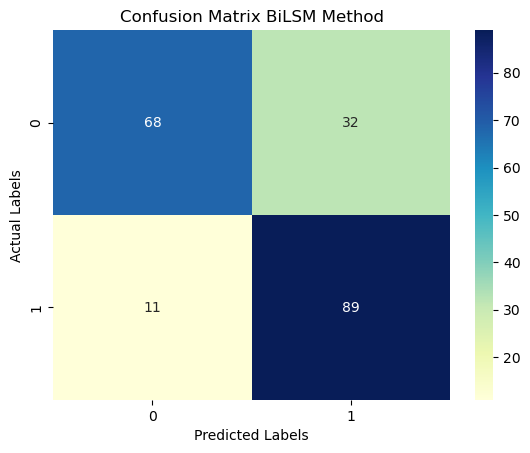

Total time: 17.88367009162903 seconds


In [4]:
from keras.models import load_model

# load the model
loaded_bilstm_model = load_model("model.h5")

y_pred = loaded_bilstm_model.predict(input_data)

y_pred = y_pred[:, 1]

y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Calculate the F1-score
f1 = f1_score(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

# Calculate the recall score
recall = recall_score(y_true, y_pred)
print("Recall: {:.2f}".format(recall))

# Print the F1-score
print("F1-score: {:.2f}".format(f1))

print(f"Total time: {time() - start_time} seconds")

import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt="d")

plt.title("Confusion Matrix BiLSM Method")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

print(f"Total time: {time() - start_time} seconds")
